In [1]:
from sklearn.datasets import load_iris
dataset = load_iris()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
import pandas as pd
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [13]:
df.duplicated().sum()

1

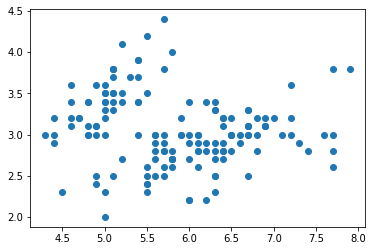

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])
plt.legend
plt.show()

In [25]:
X = df.iloc[:,:2]
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(X,test_size=0.3)

In [40]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
model.predict(X_test)

array([2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0], dtype=int32)

In [42]:
range_k = range(1,10)
l=[]
for i in range_k:
  model = KMeans(n_clusters=i)
  model.fit(X)
  sse = model.inertia_
  l.append(sse)
  print("sse value for the k={} is {}".format(i,sse))



sse value for the k=1 is 130.47526666666667
sse value for the k=2 is 58.20409278906671
sse value for the k=3 is 37.05070212765958
sse value for the k=4 is 27.9902120383037
sse value for the k=5 is 20.97958258795468
sse value for the k=6 is 17.407916182733256
sse value for the k=7 is 15.319917332667332
sse value for the k=8 is 12.94611675824176
sse value for the k=9 is 11.191112554112557


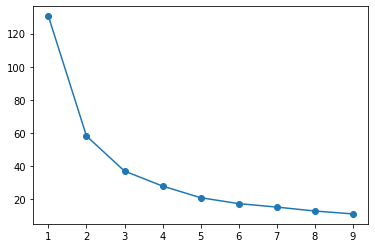

In [43]:
plt.figure()
plt.plot(range_k,l,marker='o')
plt.show()

In [44]:
model.predict(X_test)

array([4, 8, 4, 5, 8, 0, 7, 2, 1, 4, 3, 3, 8, 4, 0, 4, 7, 8, 2, 1, 2, 2,
       1, 4, 8, 0, 0, 2, 4, 1, 0, 2, 3, 1, 5, 6, 0, 5, 0, 2, 1, 0, 2, 4,
       7], dtype=int32)

In [45]:
model.predict([[4.9,3.0]])

array([4], dtype=int32)